In [1]:
import os 
os.chdir(r'Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp\src')

from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot
from neurochat.nc_lfp import NLfp
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
import math
import pynapple as nap
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

import sys
import nwb4fp.analyses.maps as mapp
from nwb4fp.analyses.examples.tracking_plot import plot_ratemap,plot_path
from nwb4fp.analyses.fields import separate_fields_by_laplace, separate_fields_by_dilation,find_peaks,separate_fields_by_laplace_of_gaussian,calculate_field_centers,distance_to_edge_function, remove_fields_by_area, map_pass_to_unit_circle,which_field,compute_crossings
from elephant.statistics import time_histogram, instantaneous_rate
from nwb4fp.analyses import maps
from nwb4fp.analyses.data import pos2speed,speed_filtered_spikes,load_speed_fromNWB,load_units_fromNWB,get_filed_num,unit_location_ch
from scipy.ndimage import gaussian_filter
import ast
import pandas as pd
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src\nwb4fp\analyses\examples\tracking_plot.py:5: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.measurements import center_of_mass


In [2]:
import pandas as pd
df_loaded = pd.read_pickle(r'Q:/sachuriga/CR_CA1_paper/tables/all_units_table.pkl')
len(df_loaded)
df_good = df_loaded[df_loaded['unit_quality']=="good"]
df_py = df_good[df_good['cell_type']=="Pyramidal cells"]
df_py.head()

,spike_times,unit_name,sd_ratio,sync_spike_8.1,presence_ratio,cluster_id.30,half_width,l_ratio.1,recovery_slope.1,cluster_id.19,...,animal_id,session_id,cell_type,functional_cell_type,genotype,experimenter,sex,cell_type_group_6_group,cell_type_group_2_group,session
0,"[53.421866666666666, 54.1465, 61.9342333333333...",41,1.665216,0.0,0.97561,0.0,0.000103,4.376648e-05,-208751.824563,0.0,...,66922,66922_2024-09-25_15-39-48_A_phy_k_manual.nwb,Pyramidal cells,Place cell,NDNF-flp +/- and Pde1c +/-,Ingvild Lynneberg Glærum,F,1,1,A
1,"[52.239733333333334, 52.245, 52.2489, 53.17986...",47,2.558734,0.0,1.00000,1.0,0.000143,9.769963e-18,-180256.638141,1.0,...,66922,66922_2024-09-25_15-39-48_A_phy_k_manual.nwb,Pyramidal cells,normal_py,NDNF-flp +/- and Pde1c +/-,Ingvild Lynneberg Glærum,F,1,1,A
6,"[49.5398, 49.547, 49.5604, 49.65533333333333, ...",8,1.036041,0.0,1.00000,6.0,0.000167,7.780387e-04,-56801.713285,6.0,...,66922,66922_2024-09-25_15-39-48_A_phy_k_manual.nwb,Pyramidal cells,normal_py,NDNF-flp +/- and Pde1c +/-,Ingvild Lynneberg Glærum,F,1,1,A
8,"[50.3438, 50.802933333333335, 51.4826, 52.1020...",14,5.749932,0.0,1.00000,8.0,0.000147,4.987387e-09,-129463.068263,8.0,...,66922,66922_2024-09-25_15-39-48_A_phy_k_manual.nwb,Pyramidal cells,normal_py,NDNF-flp +/- and Pde1c +/-,Ingvild Lynneberg Glærum,F,1,1,A
9,"[49.632933333333334, 49.71693333333333, 49.915...",15,1.087160,0.0,1.00000,9.0,0.000167,1.121190e-04,-149586.994735,9.0,...,66922,66922_2024-09-25_15-39-48_A_phy_k_manual.nwb,Pyramidal cells,normal_py,NDNF-flp +/- and Pde1c +/-,Ingvild Lynneberg Glærum,F,1,1,A



Comparison for matlab_boarderscore:
Control mean: 0.09 ± 0.03
Experimental mean: 0.24 ± 0.03
Mann-Whitney U statistic: 24018.00, p-value: 0.0044

Comparison for matlab_test_stat_si:
Control mean: 1.65 ± 0.05
Experimental mean: 1.43 ± 0.06
Mann-Whitney U statistic: 32420.00, p-value: 0.0061

Comparison for matlab_stability_smooth1:
Control mean: 0.68 ± 0.02
Experimental mean: 0.69 ± 0.02
Mann-Whitney U statistic: 27757.00, p-value: 0.9303

Comparison for matlab_sparsity:
Control mean: 0.33 ± 0.01
Experimental mean: 0.40 ± 0.02
Mann-Whitney U statistic: 24202.00, p-value: 0.0065

Comparison for matlab_maxfsize:
Control mean: 89.33 ± 5.75
Experimental mean: 116.44 ± 7.90
Mann-Whitney U statistic: 23401.50, p-value: 0.0167


C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h


Comparison for matlab_fields:
Control mean: 1.51 ± 0.05
Experimental mean: 1.51 ± 0.06
Mann-Whitney U statistic: 28723.00, p-value: 0.7474


C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


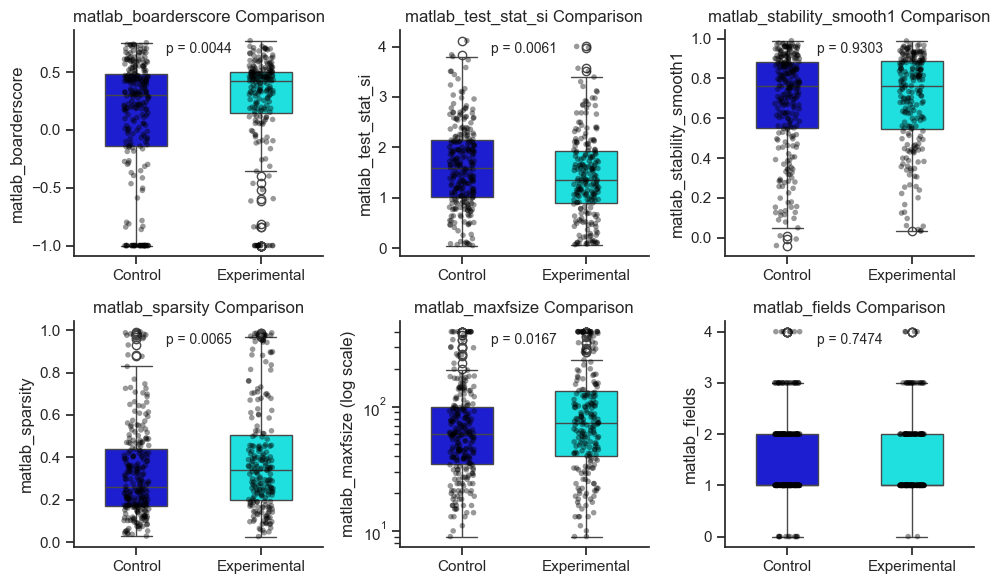


Comparison for matlab_boarderscore:
Control mean: 0.16 ± 0.04
Experimental mean: 0.18 ± 0.03
Mann-Whitney U statistic: 14481.50, p-value: 0.8595

Comparison for matlab_test_stat_si:
Control mean: 1.58 ± 0.07
Experimental mean: 1.49 ± 0.06
Mann-Whitney U statistic: 15458.00, p-value: 0.3780

Comparison for matlab_stability_smooth1:
Control mean: 0.65 ± 0.02
Experimental mean: 0.70 ± 0.02
Mann-Whitney U statistic: 11963.00, p-value: 0.0107

Comparison for matlab_sparsity:
Control mean: 0.35 ± 0.02
Experimental mean: 0.37 ± 0.02
Mann-Whitney U statistic: 13543.00, p-value: 0.2320

Comparison for matlab_maxfsize:
Control mean: 104.93 ± 8.58
Experimental mean: 114.77 ± 7.72
Mann-Whitney U statistic: 12593.50, p-value: 0.1618


C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h


Comparison for matlab_fields:
Control mean: 1.41 ± 0.07
Experimental mean: 1.48 ± 0.06
Mann-Whitney U statistic: 14004.00, p-value: 0.4180


C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


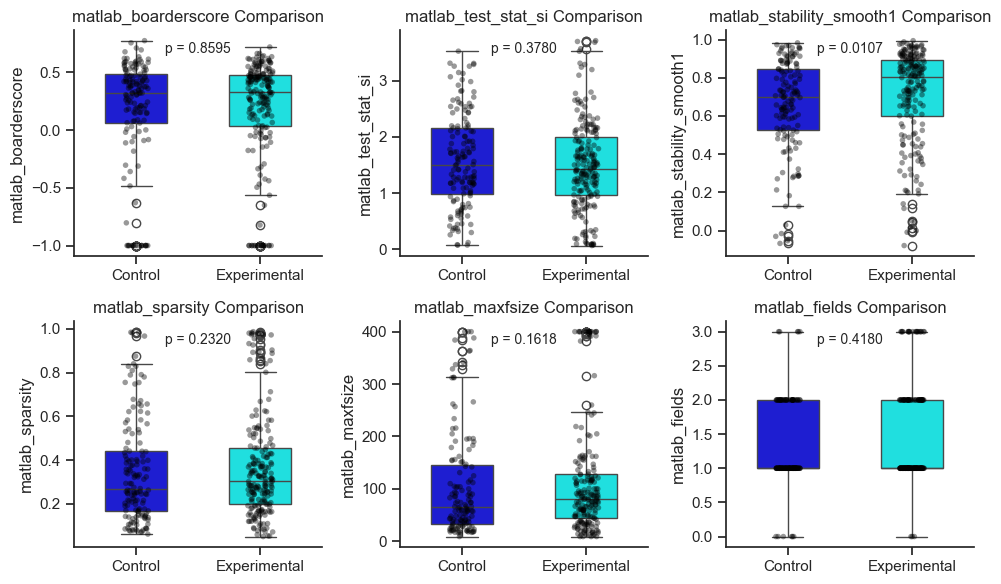


Comparison for matlab_boarderscore:
Control mean: 0.06 ± 0.05
Experimental mean: 0.20 ± 0.04
Mann-Whitney U statistic: 9493.50, p-value: 0.0023

Comparison for matlab_test_stat_si:
Control mean: 1.66 ± 0.07
Experimental mean: 1.62 ± 0.07
Mann-Whitney U statistic: 12307.00, p-value: 0.6020

Comparison for matlab_stability_smooth1:
Control mean: 0.74 ± 0.02
Experimental mean: 0.73 ± 0.02
Mann-Whitney U statistic: 10989.00, p-value: 0.7046

Comparison for matlab_sparsity:
Control mean: 0.32 ± 0.02
Experimental mean: 0.35 ± 0.02
Mann-Whitney U statistic: 11331.00, p-value: 0.4751

Comparison for matlab_maxfsize:
Control mean: 81.88 ± 7.12
Experimental mean: 105.29 ± 7.74
Mann-Whitney U statistic: 10086.00, p-value: 0.0492


C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h


Comparison for matlab_fields:
Control mean: 1.62 ± 0.07
Experimental mean: 1.44 ± 0.05
Mann-Whitney U statistic: 13142.00, p-value: 0.0702


C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


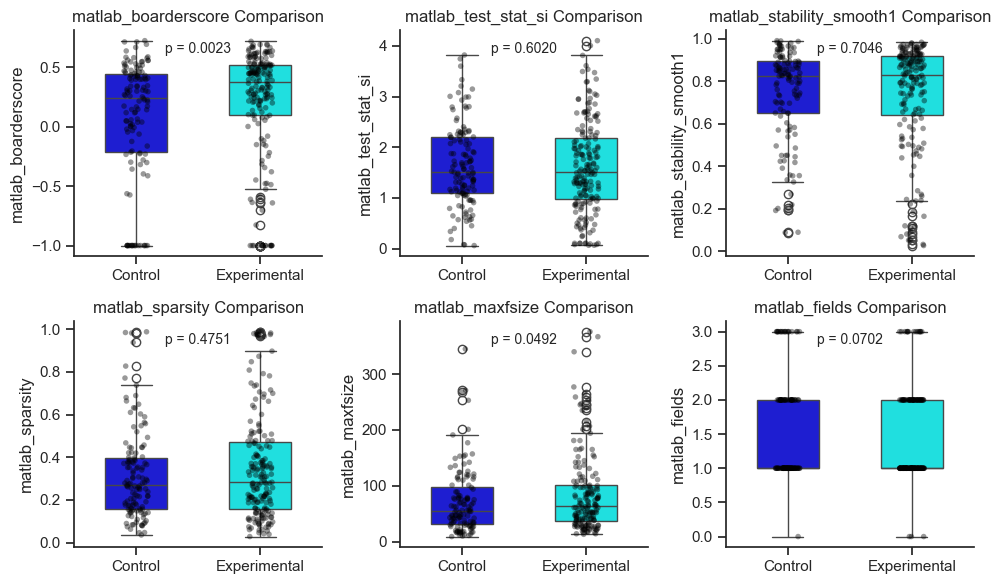


Comparison for matlab_boarderscore:
Control mean: 0.10 ± 0.02
Experimental mean: 0.21 ± 0.02
Mann-Whitney U statistic: 142181.00, p-value: 0.0005


C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(



Comparison for matlab_test_stat_si:
Control mean: 1.63 ± 0.04
Experimental mean: 1.51 ± 0.04
Mann-Whitney U statistic: 175055.00, p-value: 0.0134

Comparison for matlab_stability_smooth1:
Control mean: 0.69 ± 0.01
Experimental mean: 0.70 ± 0.01
Mann-Whitney U statistic: 147196.00, p-value: 0.0960

Comparison for matlab_sparsity:
Control mean: 0.33 ± 0.01
Experimental mean: 0.37 ± 0.01
Mann-Whitney U statistic: 146346.00, p-value: 0.0066

Comparison for matlab_maxfsize:
Control mean: 91.66 ± 4.03
Experimental mean: 112.50 ± 4.51
Mann-Whitney U statistic: 135171.50, p-value: 0.0005

Comparison for matlab_fields:
Control mean: 1.51 ± 0.04
Experimental mean: 1.48 ± 0.03
Mann-Whitney U statistic: 165082.00, p-value: 0.4417


C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_25800\122899392.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

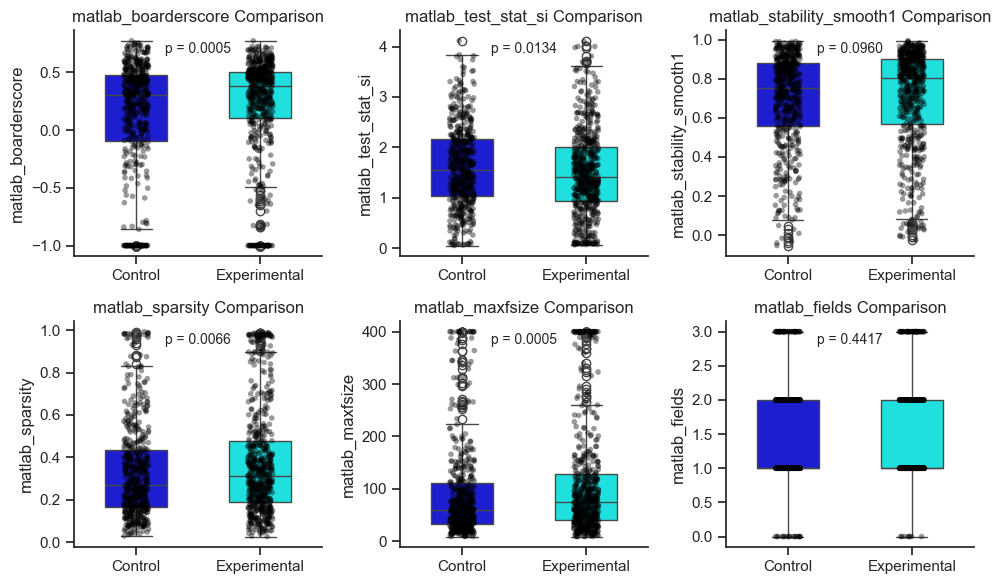

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load Good units
df_good = df_loaded[df_loaded['unit_quality'] == "good"]
df_py = df_good[df_good['cell_type'] == "Pyramidal cells"]

df = df_py

base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/functional_cell_type"

control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']

session = ["A", "B", "C", "Total"]

for session in session:
    # Filter for sessions
    if session == "Total":
        df_a = df
    else:
        df_a = df[df['session'] == session]

    # Separate into control and experimental groups
    control_df = df_a[df_a['animal_id'].isin(control_ids)]
    exp_df = df_a[df_a['animal_id'].isin(exp_ids)]

    # Set Seaborn theme
    sns.set_theme(style="ticks")

    # Statistical comparisons for scalar metrics
    metrics = ['matlab_boarderscore', 'matlab_test_stat_si', 'matlab_stability_smooth1', 
               'matlab_sparsity', 'matlab_maxfsize', 'matlab_fields']

    # Create figure with 3x2 subplots
    fig, axes = plt.subplots(2, 3, figsize=(10, 6))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    # Define custom colors
    control_color = sns.color_palette(palette='flag')[-1]  # Dark blue for Control
    exp_color = "cyan"  # Light blue for Experimental

    for idx, metric in enumerate(metrics):
        control_values = control_df[metric].dropna()
        exp_values = exp_df[metric].dropna()
        
        if len(control_values) > 0 and len(exp_values) > 0:
            control_mean = control_values.mean()
            exp_mean = exp_values.mean()
            control_sem = control_values.sem()
            exp_sem = exp_values.sem()
            
            print(f"\nComparison for {metric}:")
            print(f"Control mean: {control_mean:.2f} ± {control_sem:.2f}")
            print(f"Experimental mean: {exp_mean:.2f} ± {exp_sem:.2f}")
            
            # Mann-Whitney U test
            u_stat, p_val = stats.mannwhitneyu(control_values, exp_values, alternative='two-sided')
            print(f"Mann-Whitney U statistic: {u_stat:.2f}, p-value: {p_val:.4f}")
            
            # Prepare data for Seaborn plotting
            plot_df = pd.DataFrame({
                'value': pd.concat([control_values, exp_values]),
                'group': ['Control'] * len(control_values) + ['Experimental'] * len(exp_values)
            })
            
            # Check if deviation is "too large" (using coefficient of variation > 1 as threshold)
            all_values = plot_df['value']
            cv = all_values.std() / all_values.mean()  # Coefficient of variation
            use_log_scale = cv > 1 and all_values.min() > 0  # Ensure positive values for log scale
            
            # Filter out outliers (e.g., beyond 3 standard deviations)
            mean_val = all_values.mean()
            std_val = all_values.std()
            plot_df_filtered = plot_df[(plot_df['value'] >= mean_val - 3 * std_val) & 
                                       (plot_df['value'] <= mean_val + 3 * std_val)]
            
            # Create box plot on the specific subplot
            sns.boxplot(
                data=plot_df_filtered,
                x='group',
                y='value',
                ax=axes[idx],
                palette={"Control": control_color, "Experimental": exp_color},
                width=0.5  # Adjust width of boxes
            )
            
            # Add individual points with matching colors
            sns.stripplot(
                data=plot_df_filtered,
                x='group',
                y='value',
                ax=axes[idx],
                size=4,
                hue='group',
                palette={"Control": "black", "Experimental": "black"},
                alpha=0.4,
                jitter=0.1,
                legend=False
            )
            
            # Set title and labels
            axes[idx].set_title(f'{metric} Comparison')
            axes[idx].set_ylabel(metric)
            axes[idx].set_xlabel('Group')
            axes[idx].yaxis.grid(False)
            axes[idx].set(xlabel="")
            
            # Apply log scale if deviation is too large
            if use_log_scale:
                axes[idx].set_yscale('log')
                axes[idx].set_ylabel(f'{metric} (log scale)')
            
            # Add p-value at the top of the plot
            axes[idx].text(0.5, 0.95, f'p = {p_val:.4f}', 
                           horizontalalignment='center', 
                           verticalalignment='top', 
                           transform=axes[idx].transAxes, 
                           fontsize=10)
            
            # Remove top and right spines, keep bottom (x) and left (y) axes
            axes[idx].spines['top'].set_visible(False)
            axes[idx].spines['right'].set_visible(False)
            axes[idx].spines['bottom'].set_visible(True)
            axes[idx].spines['left'].set_visible(True)

    # Save the figure
    fig.savefig(fr'{base_folder}/{session}_functional_pyramidal.eps', format='eps', bbox_inches='tight')
    fig.savefig(fr'{base_folder}/{session}_functional_pyramidal.png', format='png', bbox_inches='tight')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

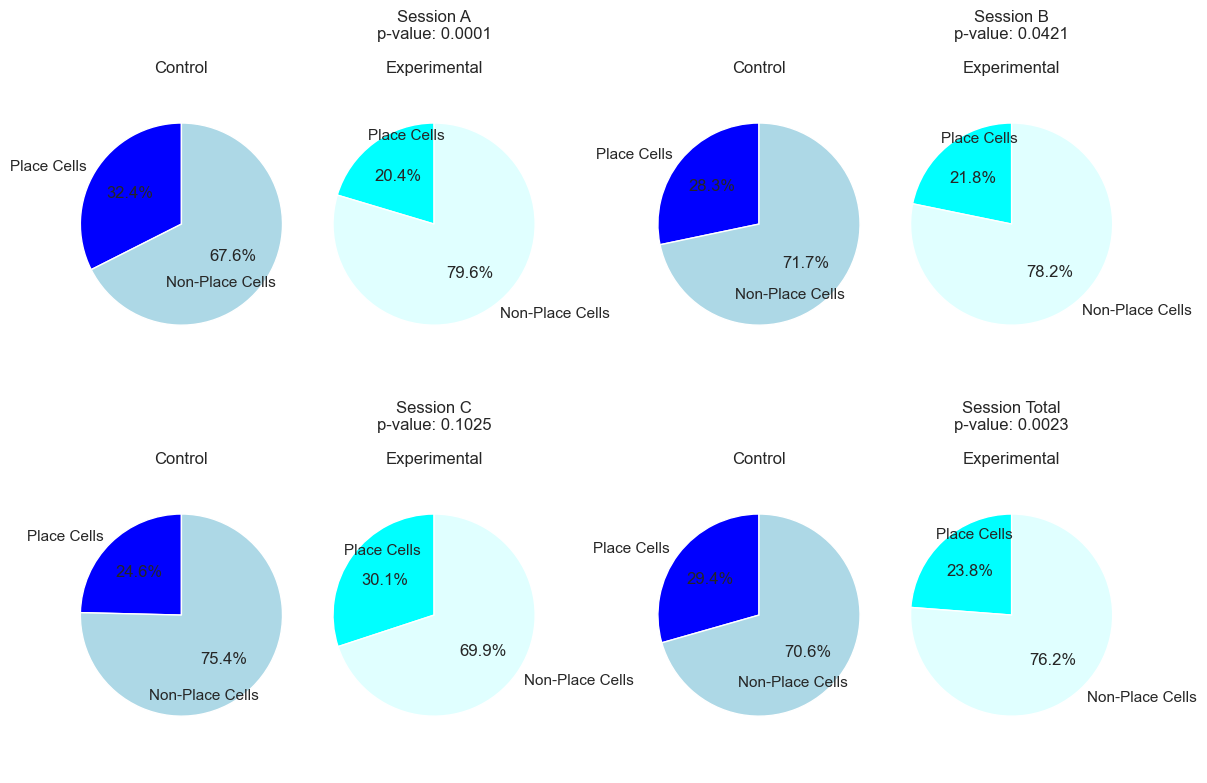

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Assuming df_loaded is already defined
# Load Good units
df_good = df_loaded[df_loaded['unit_quality'] == "good"]
df_py = df_good[df_good['cell_type'] == "Pyramidal cells"]
df = df_py

base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/functional_cell_type"

control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']
sessions = ["A", "B", "C", "Total"]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, session in enumerate(sessions):
    # Filter for sessions
    if session == "Total":
        df_a = df

        control_df = df_a[df_a['animal_id'].isin(control_ids)]
        exp_df = df_a[df_a['animal_id'].isin(exp_ids)]
        control_df_place = control_df[(control_df['matlab_reject_h0'] == 1) & 
                              (control_df['matlab_test_stat_si'] >= 1.7191) & 
                              (control_df['matlab_maxfsize'] >= 20) &
                              (control_df['firing_range'] < 10)]

        exp_df_place = exp_df[(exp_df['matlab_reject_h0'] == 1) & 
                            (exp_df['matlab_test_stat_si'] >= 1.7191) & 
                            (exp_df['matlab_maxfsize'] >= 20)&
                            (exp_df['firing_range'] < 10)]

    else:

        df_a = df[df['session'] == session]
        control_df = df_a[df_a['animal_id'].isin(control_ids)]
        exp_df = df_a[df_a['animal_id'].isin(exp_ids)]
        control_df_place = control_df[(control_df['matlab_reject_h0'] == 1) & 
                              (control_df['matlab_test_stat_si'] >= 1.7191) & 
                              (control_df['matlab_maxfsize'] >= 20) &
                              (control_df['firing_range'] < 10)]

        exp_df_place = exp_df[(exp_df['matlab_reject_h0'] == 1) & 
                            (exp_df['matlab_test_stat_si'] >= 1.7191) & 
                            (exp_df['matlab_maxfsize'] >= 20)&
                            (exp_df['firing_range'] < 10)]


    # Calculate numbers for pie charts
    control_place = len(control_df_place)
    control_non_place = len(control_df) - control_place
    exp_place = len(exp_df_place)
    exp_non_place = len(exp_df) - exp_place

    # Binomial test
    control_successes = control_place
    control_trials = len(control_df)
    exp_successes = exp_place
    exp_trials = len(exp_df)

    # Control proportion as null hypothesis
    p0 = control_successes / control_trials if control_trials > 0 else 0
    result = stats.binomtest(exp_successes, exp_trials, p=p0, alternative='two-sided')
    p_value = result.pvalue

    # Data for pie charts
    control_data = [control_place, control_non_place]
    exp_data = [exp_place, exp_non_place]
    labels = ['Place Cells', 'Non-Place Cells']
    colors = ['blue', 'lightblue']
    colors1 = ['cyan',  'lightcyan']

    # Create pie charts
    ax = axes[idx]
    ax.pie(control_data, labels=labels, colors=colors, autopct='%1.1f%%', 
           startangle=90, radius=0.8, center=(-1, 0))
    ax.pie(exp_data, labels=labels, colors=colors1, autopct='%1.1f%%', 
           startangle=90, radius=0.8, center=(1, 0))
    
    # Add title and p-value
    ax.set_title(f'Session {session}\np-value: {p_value:.4f}', pad=20)
    
    # Add group labels
    ax.text(-1, 1.2, 'Control', ha='center')
    ax.text(1, 1.2, 'Experimental', ha='center')
fig.savefig(fr'{base_folder}/Functional_number_of_placecells.eps', format='eps', bbox_inches='tight')
fig.savefig(fr'{base_folder}/Functional_number_of_placecells.png', format='png', bbox_inches='tight')

plt.tight_layout()
plt.show()

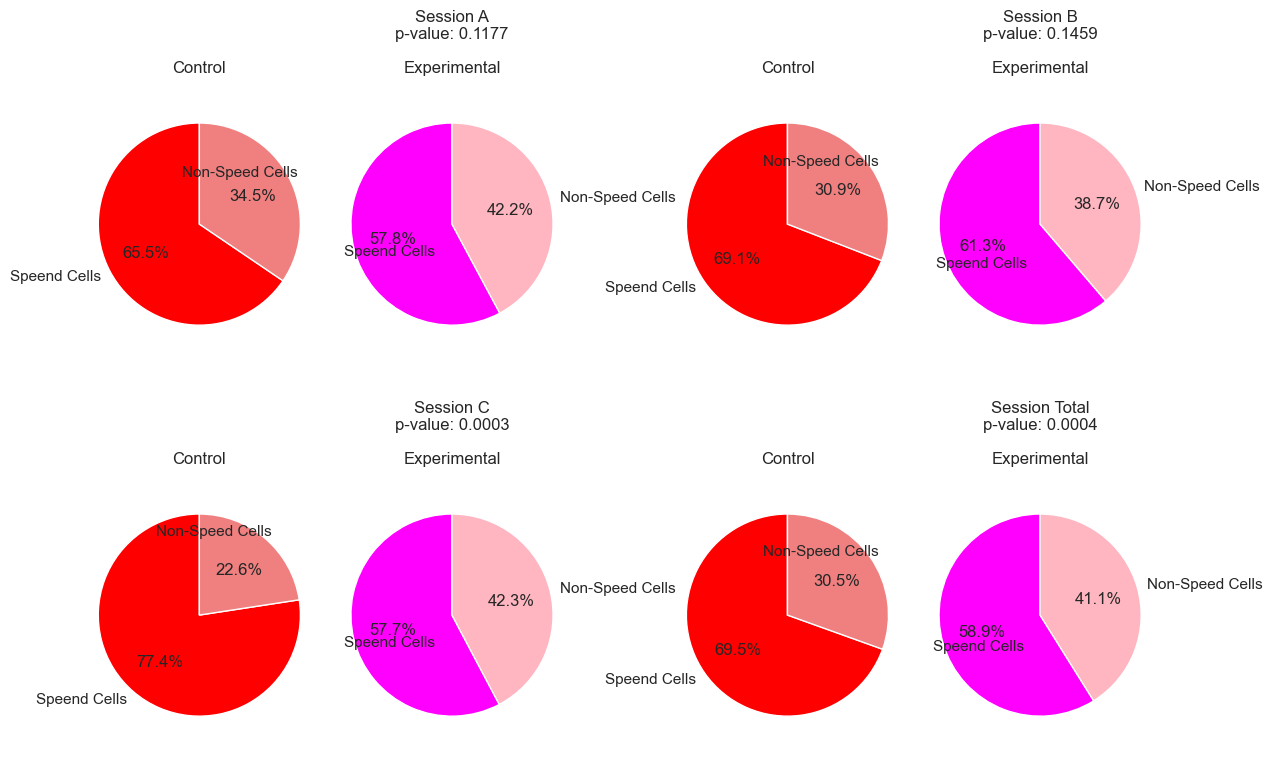

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Assuming df_loaded is already defined
# Load Good units
df_good = df_loaded[df_loaded['unit_quality'] == "good"]
df_py = df_good[(df_good['cell_type']=="Narrow spike interneuron")|(df_good['cell_type']=="Wide Spike Interneurons")]
df = df_py

base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/functional_cell_type"

control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']
sessions = ["A", "B", "C", "Total"]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, session in enumerate(sessions):
    # Filter for sessions
    if session == "Total":
        df_a = df

        control_df = df_a[df_a['animal_id'].isin(control_ids)]
        exp_df = df_a[df_a['animal_id'].isin(exp_ids)]
        control_df_place = control_df[(control_df['matlab_speedScores'] >= 0.3)]
        exp_df_place = exp_df[(exp_df['matlab_speedScores'] >= 0.3)]

    else:

        df_a = df[df['session'] == session]
        control_df = df_a[df_a['animal_id'].isin(control_ids)]
        exp_df = df_a[df_a['animal_id'].isin(exp_ids)]
        control_df_place = control_df[(control_df['matlab_speedScores'] >= 0.3)]
        exp_df_place = exp_df[(exp_df['matlab_speedScores'] >= 0.3)]


    # Calculate numbers for pie charts
    control_place = len(control_df_place)
    control_non_place = len(control_df) - control_place
    exp_place = len(exp_df_place)
    exp_non_place = len(exp_df) - exp_place

    # Binomial test
    control_successes = control_place
    control_trials = len(control_df)
    exp_successes = exp_place
    exp_trials = len(exp_df)

    # Control proportion as null hypothesis
    p0 = control_successes / control_trials if control_trials > 0 else 0
    result = stats.binomtest(exp_successes, exp_trials, p=p0, alternative='two-sided')
    p_value = result.pvalue

    # Data for pie charts
    control_data = [control_place, control_non_place]
    exp_data = [exp_place, exp_non_place]
    labels = ['Speend Cells', 'Non-Speed Cells']
    colors = ['red', 'lightcoral']  # instead of 'red', 'lightred'
    colors1 = ['magenta', 'lightpink']  # instead of 'magenta', 'lightmagenta'

    # Create pie charts
    ax = axes[idx]
    ax.pie(control_data, labels=labels, colors=colors, autopct='%1.1f%%', 
           startangle=90, radius=0.8, center=(-1, 0))
    ax.pie(exp_data, labels=labels, colors=colors1, autopct='%1.1f%%', 
           startangle=90, radius=0.8, center=(1, 0))
    
    # Add title and p-value
    ax.set_title(f'Session {session}\np-value: {p_value:.4f}', pad=20)
    
    # Add group labels
    ax.text(-1, 1.2, 'Control', ha='center')
    ax.text(1, 1.2, 'Experimental', ha='center')
fig.savefig(fr'{base_folder}/Functional_number_of_speedcells.eps', format='eps', bbox_inches='tight')
fig.savefig(fr'{base_folder}/Functional_number_of_speedcells.png', format='png', bbox_inches='tight')

plt.tight_layout()
plt.show()

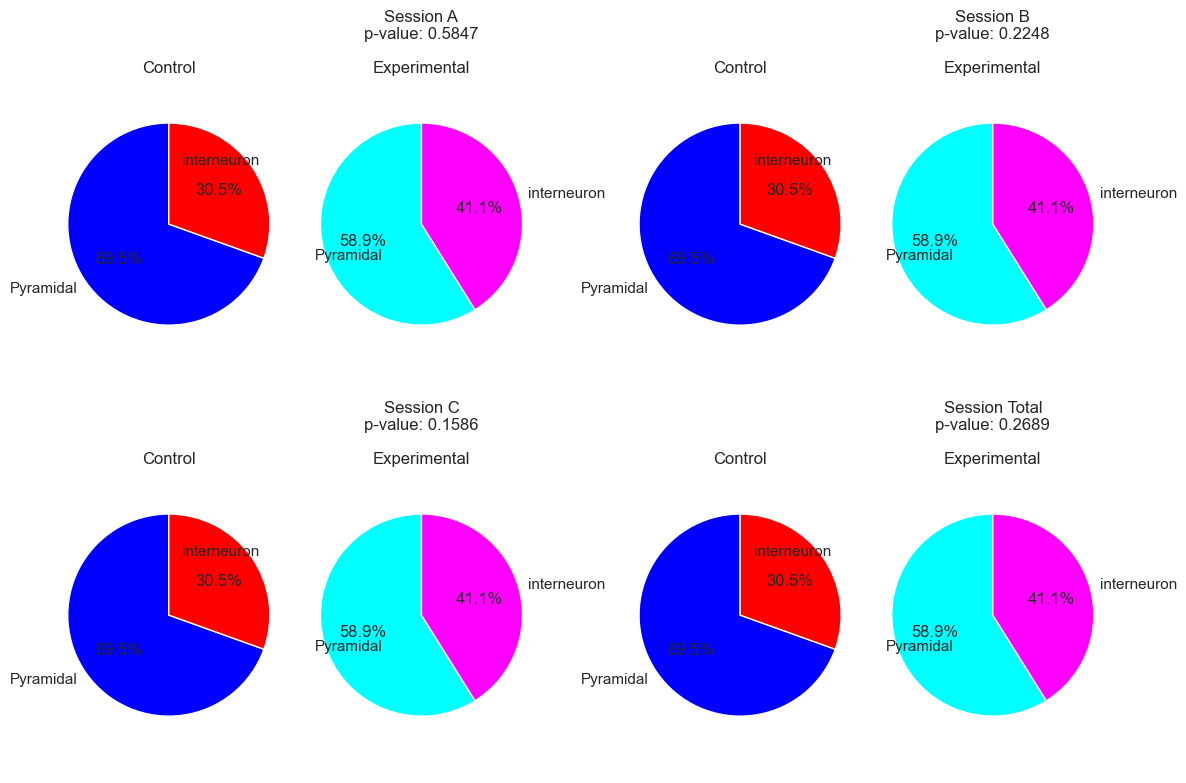

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Assuming df_loaded is already defined
# Load Good units
df_good = df_loaded[df_loaded['unit_quality'] == "good"]
df = df_good

base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/functional_cell_type"

control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']
sessions = ["A", "B", "C", "Total"]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, session in enumerate(sessions):
    # Filter for sessions
    if session == "Total":
        df_a = df

        control_df = df_a[df_a['animal_id'].isin(control_ids)]
        exp_df = df_a[df_a['animal_id'].isin(exp_ids)]
        control_df_py = control_df[control_df['cell_type'] == "Pyramidal cells"]
        control_df_int = control_df[(control_df['cell_type']=="Narrow spike interneuron")|(control_df['cell_type']=="Wide Spike Interneurons")]
        exp_df_py =  exp_df[exp_df['cell_type'] == "Pyramidal cells"]
        exp_df_int =  exp_df[(exp_df['cell_type']=="Narrow spike interneuron")|(exp_df['cell_type']=="Wide Spike Interneurons")]

    else:

        df_a = df[df['session'] == session]
        control_df = df_a[df_a['animal_id'].isin(control_ids)]
        exp_df = df_a[df_a['animal_id'].isin(exp_ids)]
        control_df_py = control_df[control_df['cell_type'] == "Pyramidal cells"]
        control_df_int = control_df[(control_df['cell_type']=="Narrow spike interneuron")|(control_df['cell_type']=="Wide Spike Interneurons")]
        exp_df_py =  exp_df[exp_df['cell_type'] == "Pyramidal cells"]
        exp_df_int =  exp_df[(exp_df['cell_type']=="Narrow spike interneuron")|(exp_df['cell_type']=="Wide Spike Interneurons")]


    # Calculate numbers for pie charts
    control_py = len(control_df_py)
    control_int = len(control_df_int)
    exp_py = len(exp_df_py)
    exp_int = len(exp_df_int)

    # Binomial test
    control_successes = control_py 
    control_trials = control_py + control_int
    exp_successes = exp_py
    exp_trials = exp_py + exp_int

    # Control proportion as null hypothesis
    p0 = control_successes / control_trials if control_trials > 0 else 0
    result = stats.binomtest(exp_successes, exp_trials, p=p0, alternative='two-sided')
    p_value = result.pvalue

    # Data for pie charts
    control_data = [control_place, control_non_place]
    exp_data = [exp_place, exp_non_place]

    labels = ['Pyramidal', 'interneuron']
    colors = ['blue', 'red']  # instead of 'red', 'lightred'
    colors1 = ['cyan', 'magenta']  # instead of 'magenta', 'lightmagenta'

    # Create pie charts
    ax = axes[idx]
    ax.pie(control_data, labels=labels, colors=colors, autopct='%1.1f%%', 
           startangle=90, radius=0.8, center=(-1, 0))
    ax.pie(exp_data, labels=labels, colors=colors1, autopct='%1.1f%%', 
           startangle=90, radius=0.8, center=(1, 0))
    
    # Add title and p-value
    ax.set_title(f'Session {session}\np-value: {p_value:.4f}', pad=20)
    
    # Add group labels
    ax.text(-1, 1.2, 'Control', ha='center')
    ax.text(1, 1.2, 'Experimental', ha='center')
fig.savefig(fr'{base_folder}/PyvsInt.eps', format='eps', bbox_inches='tight')
fig.savefig(fr'{base_folder}/PyvsInt.png', format='png', bbox_inches='tight')

plt.tight_layout()
plt.show()